# Práctica 0 
### Itziar López Almagro y Adrian Carlos Skaczylo 



En esta práctica se realiza, mediante el método de Monte Carlo, el cálculo aproximado de la integral definida de una función positiva en un intervalo $[a,b]$.

El objetivo principal es acotar la gráfica de la función en un rectángulo $[a,b] \times [0,M]$. Para ello dividimos, de manera uniforme, el intervalo $[a,b]$ en subintervalos $[x_i, x_{i+1}]$ donde $a < x_1 < \dots < x_n < b$. Con cada uno de estos $x_i$ calculamos $f(x_i)$ y nos quedamos con el máximo $M$ de todos ellos, es decir, 

$$
M = \max \{ f(x_i) \}.
$$

De esta manera podremos obtener, aproximadamente, el máximo de la función $f$ en $[a,b]$.

Una vez tenemos el rectángulo $[a,b] \times [0,M]$ generamos *num_puntos* puntos aleatorios en dicho rectángulo y con cada uno de ellos comprobamos si cae dentro del área que forma la gráfica con el eje $X$.

Finalmente realizamos el siguiente cálculo:

$$
I \approx (\frac{N_{\text{debajo}}}{N_{\text{total}}} \times (b - a) \times M)
$$



### Implementación
Vamos a hacer dos implementaciones: una utilizando directamente el metodo descrito y otra utilizando vectores y metodos de la biblioteca numpy

In [ ]:
!pip install numpy
!pip install matplotlib

In [64]:
import numpy as np
import matplotlib.pyplot as plt #Grafica de funciones
import random
N = 1000


### Método 1

Primero definimos la funcion auxiliar *maximo_relativo* que se encarga de realizar la subdivision $[x_i, x_{i+1}]$ del intervalo $[a, b]$ y devolver el máximo  $M = \max \{ f(x_i) \}$.

In [65]:
def maximo_relativos(a,b,fun):
    subintervalos = np.linspace(a,b,N) #Division del intervalo [a,b]

    valores = [fun(x) for x in subintervalos] #evaluamos f(x_i)
    return max(valores) #Devolvemos el maximo

Procedemos a la implementación del algoritmo:

In [66]:
def integra_mc(fun, a, b, num_puntos =10000):

    M = maximo_relativos(a,b,fun) #Calculamos el maximo
    N_Debajo = 0 #Definimos el contador N_Debajo


    for _ in range(0,num_puntos): 
        
        #Generamos un punto aleatorio (x,y)
        punto = (random.uniform(a,b),random.uniform(0,M))

        if punto[1] <= fun(punto[0]) : #Si y <= f(x) entonces N_Debajo ++
            N_Debajo +=1

    return (N_Debajo/num_puntos)*(b-a)*M

### Método 2

La idea es prescindir del bucle que itera *num_puntos* veces y esto se consigue mediante la funcion *sum* implementada en numpy, la cual permite , dada una lista $ l = [a_1,a_2,...,a_n] $, sumar todos sus elementos , es decir,

$$
sum(l) = \sum_{i=1}^{n} a_i
$$

En nuestro caso, generaremos una lista de booleanos donde  $True =1$ y $False = 0 $


In [67]:
def integra_mc_fast(fun,a,b,num_puntos=10000):
    M = maximo_relativos(a,b,fun) #Calculamos el maximo M

    #Generamos la componente x e y de los puntos aleatorios en distintas listas
    x_vector = np.linspace(a,b,num_puntos) 
    y_vector = np.linspace(0,M,num_puntos)

    f_evaluados = fun(x_vector) #lista con los valores f(x_i)

    N_debajo = np.sum(y_vector <= f_evaluados) #y_vector <= f_evaluados generará una lista de booleanos y con sum realizamos la suma

    return (N_debajo/num_puntos)*(b-a)*M

### Resultado
Vamos a definir un par de funciones en ciertos intervalos y comparar los resultados que dan ambos metodos con el valor real de la integral.

Hemos decidido implementar una funcion que dibuje la grafica de la funcion para hacer el proceso mas visual y ameno.

In [68]:
def graficaFuncion(fun,a,b):
    x = np.linspace(a,b,N)
    y = fun(x)
    plt.plot(x,y)
    plt.title('Grafica de la función')
    # Mostrar el gráfico
    plt.grid(True)
    plt.show()

In [ ]:
#Deberiamos poner 3 ejemplos de funciones:
# -Una funcion sencilla como -x2+1
# -Otra funcion que tenga dos maximos 
# - Otra que sea super rara y tenga un monton de minimos y maximos 
#Con cada una de ellas hacer 3 ejecuciones : muy pocos puntos , cantidad decente de puntos y muchos puntos
# y comparar resultados de error (podriamos hacer una grafica )

#y Luego con esos mismas ejecuciones comparar tiempos y lo mismo hacer otra grafica 

### Ejemplo 1 

$ f(x) = -x^2 + 1, \quad x \in [-1, 1] $

$\int_{-1}^{1} (-x^2 + 1) \, dx =  \frac{4}{3} \approx 1.33333333 $


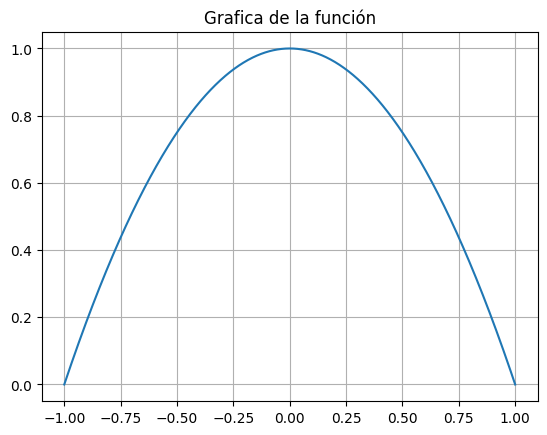

In [69]:
def f1(x):
     return -(x)**2 +1

graficaFuncion(f1,-1,1)


In [70]:
i1 = integra_mc(f1,-1,1,10000)
i2 = integra_mc_fast(f1,-1,1,10000)
i1,i2

(np.float64(1.3281986691396102), np.float64(1.499998496995494))